<a href="https://colab.research.google.com/github/2series/test/blob/main/test_copy2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get Data

In [1]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz

file_id = '12nRGXBL6u38sCET_x1OmLW6Hlthob-e_' # app_data_final.csv
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [3]:
# The shareable link
link = 'https://drive.google.com/open?id=12nRGXBL6u38sCET_x1OmLW6Hlthob-e_'

In [4]:
# Verify everything after '='
fluff, id = link.split('=')
print (id) 

12nRGXBL6u38sCET_x1OmLW6Hlthob-e_


In [5]:
# Libraries are imported at the start of nb
!pip install scikit-plot

In [6]:
# Import libraries and prepare the data
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True, precision=3)
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
from pandas.plotting import scatter_matrix

from sklearn import metrics
from sklearn import neighbors
from sklearn import ensemble
from sklearn import tree
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
import scikitplot as skplt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn import svm
plt.style.use('ggplot')

In [7]:
# Stored dataset in a Pandas Dataframe
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('app_data_final.csv')  
df = pd.read_csv('app_data_final.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,NaN,1,0,Laborers,1.0,2,10,Business Entity Type 3,0.083037,0.262949,0.139376,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,NaN,1,0,Core staff,2.0,1,11,School,0.311267,0.622246,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,26.0,1,0,Laborers,1.0,2,9,Government,NaN,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,NaN,0,0,Laborers,2.0,2,17,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,NaN,0,0,Core staff,1.0,2,11,Religion,NaN,0.322738,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df.shape

(307511, 34)

In [9]:
df.columns.unique()

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'OWN_CAR_AGE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [10]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,104582.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,12.061091,0.281066,0.056720,2.152665,2.052463,12.063419,0.502130,5.143927e-01,0.510853,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,11.944812,0.449521,0.231307,0.910682,0.509034,3.265832,0.211062,1.910602e-01,0.194844,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.014568,8.170000e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,5.000000,0.000000,0.000000,2.000000,2.000000,10.000000,0.334007,3.924574e-01,0.370650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,9.000000,0.000000,0.000000,2.000000,2.000000,12.000000,0.505998,5.659614e-01,0.535276,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,15.000000,1.000000,0.000000,3.000000,2.000000,14.000000,0.675053,6.636171e-01,0.669057,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,91.000000,1.000000,1.000000,20.000000,3.000000,23.000000,0.962693,8.549997e-01,0.896010,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [11]:
# Preview data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_TYPE_SUITE             306219 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

# Data Cleaning

In [12]:
# Preview missing values
df.isnull().any()

SK_ID_CURR                    False
TARGET                        False
NAME_CONTRACT_TYPE            False
CODE_GENDER                   False
FLAG_OWN_CAR                  False
FLAG_OWN_REALTY               False
CNT_CHILDREN                  False
AMT_INCOME_TOTAL              False
AMT_CREDIT                    False
AMT_ANNUITY                    True
AMT_GOODS_PRICE                True
NAME_TYPE_SUITE                True
NAME_INCOME_TYPE              False
NAME_EDUCATION_TYPE           False
NAME_FAMILY_STATUS            False
NAME_HOUSING_TYPE             False
REGION_POPULATION_RELATIVE    False
OWN_CAR_AGE                    True
FLAG_PHONE                    False
FLAG_EMAIL                    False
OCCUPATION_TYPE                True
CNT_FAM_MEMBERS                True
REGION_RATING_CLIENT          False
HOUR_APPR_PROCESS_START       False
ORGANIZATION_TYPE             False
EXT_SOURCE_1                   True
EXT_SOURCE_2                   True
EXT_SOURCE_3                

In [13]:
# Quantify number of missing values
df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
OWN_CAR_AGE                   202929
FLAG_PHONE                         0
FLAG_EMAIL                         0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
HOUR_APPR_PROCESS_START            0
ORGANIZATION_TYPE                  0
EXT_SOURCE_1                  173378
EXT_SOURCE_2                     660
E

In [14]:
# Preview percentages of missing values
missing_values = ((df.isna().sum()) / len(df.index)).sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]
print(missing_values*100)

OWN_CAR_AGE                   65.990810
EXT_SOURCE_1                  56.381073
OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
NAME_TYPE_SUITE                0.420148
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
dtype: float64


In [15]:
# Drop columns where NaN is more than 30%
df.drop(missing_values[missing_values > 0.3].index, axis=1, inplace=True)

In [16]:
# Drop rows where NaN is more than 30
df.dropna(axis=0, thresh=30, inplace=True)

In [17]:
df.shape

(265579, 31)

In [18]:
# Quantify number of missing values
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      11
AMT_GOODS_PRICE                   0
NAME_TYPE_SUITE                 868
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
FLAG_PHONE                        0
FLAG_EMAIL                        0
CNT_FAM_MEMBERS                   0
REGION_RATING_CLIENT              0
HOUR_APPR_PROCESS_START           0
ORGANIZATION_TYPE                 0
EXT_SOURCE_2                    430
EXT_SOURCE_3                  19243
AMT_REQ_CREDIT_BUREAU_HOUR        0
AMT_REQ_CREDIT_BUREAU_DAY         0
AMT_REQ_CREDIT_BUREAU_WEEK  

# Imputation of NaN values

In [19]:
# numeric columns
df.fillna(df.select_dtypes(include='number').mean().iloc[0], inplace=True)

# categorical columns
df.fillna(df.select_dtypes(include='object').mode().iloc[0], inplace=True)

In [20]:
# Preview unique values
unique_val = df.apply(lambda x: len(pd.unique(x)), axis=0).sort_values(ascending=False)
unique_val

SK_ID_CURR                    265579
EXT_SOURCE_2                  111938
AMT_ANNUITY                    13193
AMT_CREDIT                      5265
AMT_INCOME_TOTAL                2182
AMT_GOODS_PRICE                  840
EXT_SOURCE_3                     815
REGION_POPULATION_RELATIVE        81
ORGANIZATION_TYPE                 58
AMT_REQ_CREDIT_BUREAU_YEAR        25
AMT_REQ_CREDIT_BUREAU_MON         24
HOUR_APPR_PROCESS_START           24
CNT_FAM_MEMBERS                   17
CNT_CHILDREN                      15
AMT_REQ_CREDIT_BUREAU_QRT         11
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_DAY          9
NAME_INCOME_TYPE                   8
NAME_TYPE_SUITE                    8
NAME_HOUSING_TYPE                  6
AMT_REQ_CREDIT_BUREAU_HOUR         5
NAME_EDUCATION_TYPE                5
NAME_FAMILY_STATUS                 5
CODE_GENDER                        3
REGION_RATING_CLIENT               3
FLAG_PHONE                         2
FLAG_EMAIL                         2
F

In [21]:
# Lets sample the count for variables having unique values
def column_analyse(x, df=df): 
    print(df[x].value_counts(), '\n', df[x].value_counts()/len(df[x]))

column_analyse('TARGET') 
column_analyse('NAME_CONTRACT_TYPE')
column_analyse('FLAG_EMAIL')
column_analyse('REGION_RATING_CLIENT')

0    245070
1     20509
Name: TARGET, dtype: int64 
 0    0.922776
1    0.077224
Name: TARGET, dtype: float64
Cash loans         240825
Revolving loans     24754
Name: NAME_CONTRACT_TYPE, dtype: int64 
 Cash loans         0.906792
Revolving loans    0.093208
Name: NAME_CONTRACT_TYPE, dtype: float64
0    250240
1     15339
Name: FLAG_EMAIL, dtype: int64 
 0    0.942243
1    0.057757
Name: FLAG_EMAIL, dtype: float64
2    197021
3     41366
1     27192
Name: REGION_RATING_CLIENT, dtype: int64 
 2    0.741855
3    0.155758
1    0.102388
Name: REGION_RATING_CLIENT, dtype: float64


### Observation

* We will remove SK_ID_CURR as it is 100% unique
* TARGET, NAME_CONTRACT_TYPE and FLAG_EMAIL are highly imbalanced, more than 90%
* EXT_SOURCE_2, EXT_SOURCE_3, ORGANIZATION_TYPE are too detailed for analysis



In [22]:
delete_cols = ['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'FLAG_EMAIL', 
               'FLAG_PHONE', 'EXT_SOURCE_2', 
               'EXT_SOURCE_3', 'ORGANIZATION_TYPE']

df.drop(delete_cols, axis=1, inplace=True)

# Visualizations

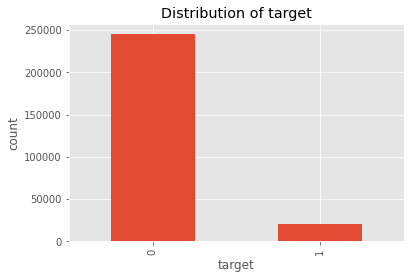

In [23]:
df['TARGET'].value_counts().plot.bar()
plt.xlabel('target')
plt.ylabel('count')
plt.title('Distribution of target')
plt.show()

We have an imbalanced dataset

O represents non-default and 1 represents default

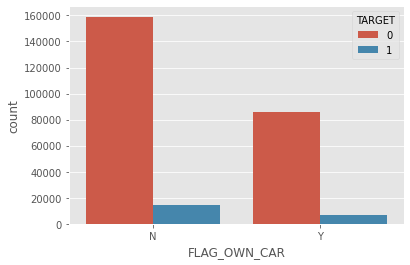

In [24]:
# FLAG_OWN_CAR
sns.countplot(x='FLAG_OWN_CAR', hue='TARGET', data=df)

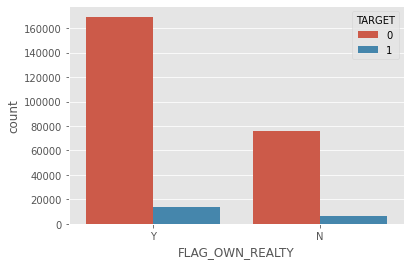

In [25]:
# FLAG_OWN_REALTY
sns.countplot(x='FLAG_OWN_REALTY', hue='TARGET', data=df)

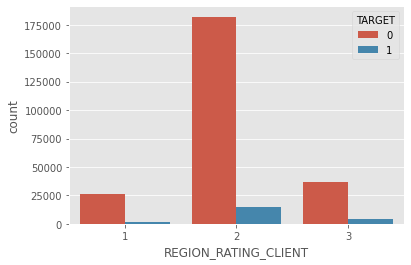

In [26]:
# REGION_RATING_CLIENT
sns.countplot(x='REGION_RATING_CLIENT', hue='TARGET', data=df)

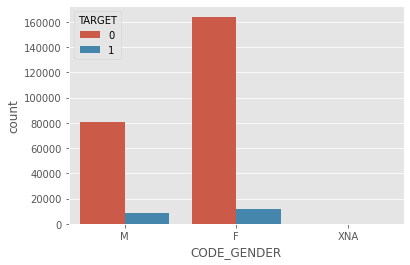

In [27]:
# CODE_GENDER
sns.countplot(x='CODE_GENDER', hue='TARGET', data=df)

In [28]:
# CODE_GENDER
# Change XNA to Male as these data points are too low
#df['COED_GENDER'] = df['CODE_GENDER'].apply(lambda x: 'M' if x in ['XNA'] else x) 

In [29]:
# NAME_HOUSING_TYPE
df['NAME_HOUSING_TYPE'].value_counts()

House / apartment      236573
With parents            12183
Municipal apartment      9587
Rented apartment         3963
Office apartment         2283
Co-op apartment           990
Name: NAME_HOUSING_TYPE, dtype: int64

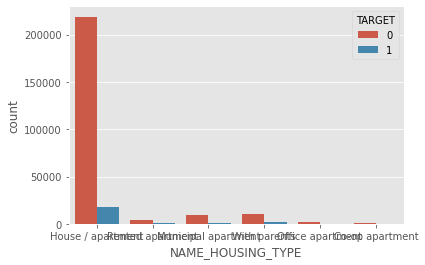

In [30]:
# NAME_HOUSING_TYPE
sns.countplot(x='NAME_HOUSING_TYPE', hue='TARGET', data=df)

In [31]:
# NAME_HOUSING_TYPE
# Change Municipal, Office, Co-op to RENTED as these data points are too low
#df['NAME_HOUSING_TYPE'] = df['NAME_HOUSING_TYPE'].apply(lambda x: 'Rented apartment' if x in ['Municipal apartment', 
#                                                                                              'Office apartment', 
#                                                                                              'Co-op apartment'] else x)

In [32]:
# NAME_TYPE_SUITE
df['NAME_TYPE_SUITE'].value_counts()

Unaccompanied        215506
Family                34412
Spouse, partner        9614
Children               2779
Other_B                1465
278131.0736955859       868
Other_A                 709
Group of people         226
Name: NAME_TYPE_SUITE, dtype: int64

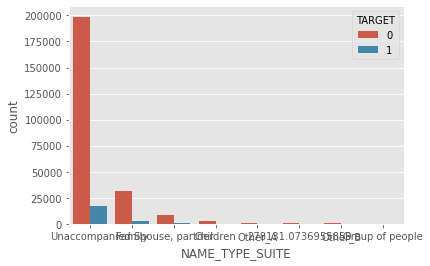

In [33]:
# NAME_TYPE_SUITE
sns.countplot(x='NAME_TYPE_SUITE', hue='TARGET', data=df)

In [34]:
# NAME_TYPE_SUITE
# Change Spouse, Children, Other_B, Other_A, Group, 278131 to Family as these data points are too low
#df['NAME_TYPE_SUITE'] = df['NAME_TYPE_SUITE'].apply(lambda x: 'Family' if x in ['Spouse, partner', 
#                                                                                'Children',
#                                                                                'Other_B',
#                                                                                '278131.0736955859',
#                                                                                'Other_A',
#                                                                                'Group of people'] else x) 

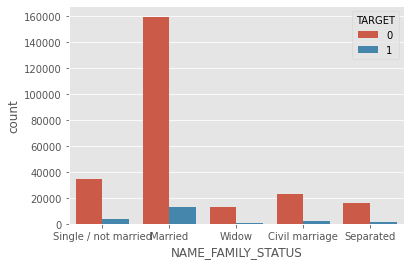

In [35]:
# NAME_FAMILY_STATUS
sns.countplot(x='NAME_FAMILY_STATUS', hue='TARGET', data=df)

# Preview Outliers

In [36]:
df.describe(percentiles=[.25, 0.5, 0.75, 0.9, 0.95])

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265579.000000,265579.000000,2.655790e+05,2.655790e+05,265579.000000,2.655790e+05,265579.000000,265579.000000,265579.00000,265579.000000,265579.000000,265579.000000,265579.000000,265579.000000,265579.000000,265579.00000
mean,0.077224,0.422473,1.713183e+05,6.065757e+05,27197.395111,5.450204e+05,0.020837,2.163601,2.05337,12.085044,0.006405,0.006996,0.034385,0.267585,0.265567,1.90079
std,0.266947,0.725623,2.485543e+05,4.047558e+05,14478.012382,3.713728e+05,0.013746,0.910917,0.50527,3.253937,0.083870,0.110742,0.204771,0.916317,0.794381,1.86959
min,0.000000,0.000000,2.610000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,1.125000e+05,2.725200e+05,16641.000000,2.385000e+05,0.010006,2.000000,2.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,1.575000e+05,5.212800e+05,24997.500000,4.500000e+05,0.018850,2.000000,2.00000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
75%,0.000000,1.000000,2.025000e+05,8.131950e+05,34749.000000,6.840000e+05,0.028663,3.000000,2.00000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.00000
90%,0.000000,2.000000,2.700000e+05,1.157958e+06,45954.000000,1.125000e+06,0.035792,3.000000,3.00000,16.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.00000
95%,1.000000,2.000000,3.375000e+05,1.350000e+06,53253.000000,1.327500e+06,0.046220,4.000000,3.00000,17.000000,0.000000,0.000000,0.000000,1.000000,2.000000,6.00000
max,1.000000,19.000000,1.170000e+08,4.050000e+06,278131.073696,4.050000e+06,0.072508,20.000000,3.00000,23.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.00000


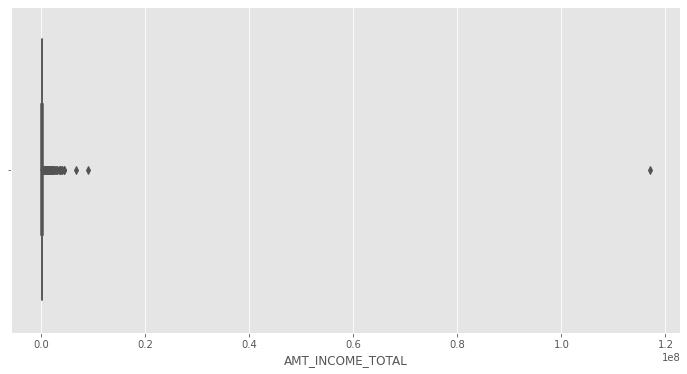

In [37]:
# AMT_INCOME_TOTAL
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
sns.boxplot(x='AMT_INCOME_TOTAL', data=df, ax=ax)

In [38]:
# AMT_INCOME_TOTAL
df[df['AMT_INCOME_TOTAL'] > 0.2]['TARGET'].value_counts()

0    245070
1     20509
Name: TARGET, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


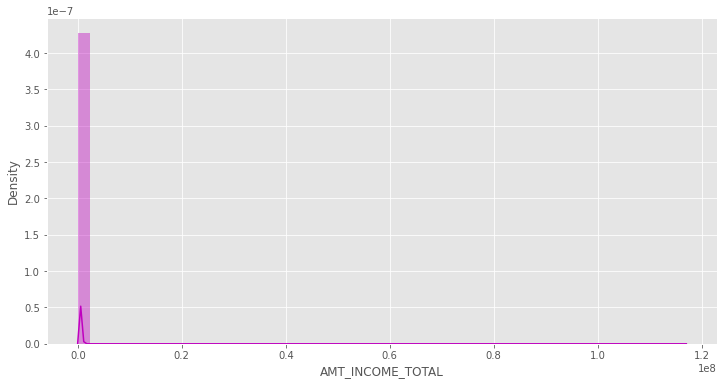

In [39]:
# AMT_INCOME_TOTAL
plt.figure(figsize=(12, 6))
sns.distplot(df['AMT_INCOME_TOTAL'], color='m')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


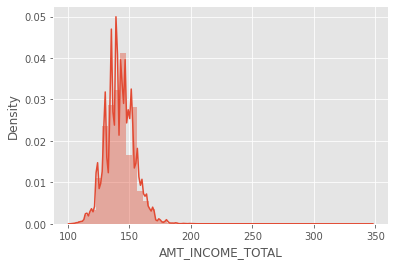

In [40]:
# AMT_INCOME_TOTAL
sns.distplot(df['AMT_INCOME_TOTAL'].apply(lambda x: np.log1p(x)**2))

In [41]:
# AMT_INCOME_TOTAL
df['AMT_INCOME_TOTAL'] = df['AMT_INCOME_TOTAL'].apply(lambda x: np.log1p(x)**2)

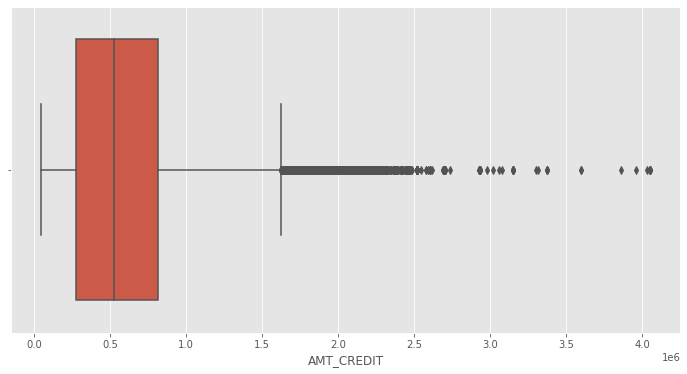

In [42]:
# AMT_CREDIT
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
sns.boxplot(x='AMT_CREDIT', data=df, ax=ax)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


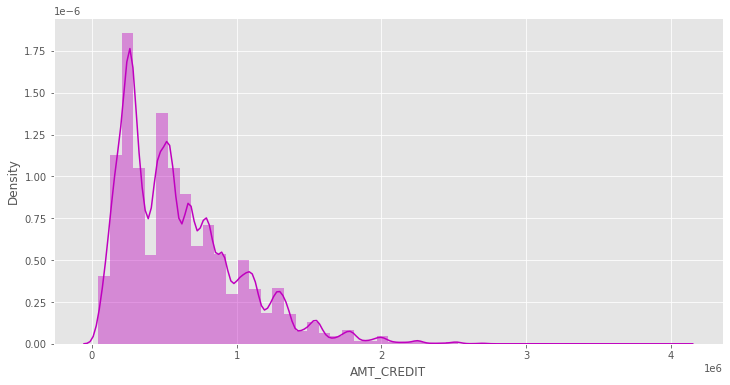

In [43]:
# AMT_CREDIT
plt.figure(figsize=(12, 6))
sns.distplot(df['AMT_CREDIT'], color='m')

### Observation

We see a right skewed variable

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


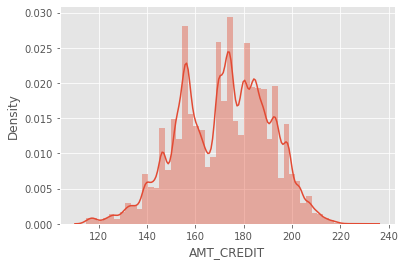

In [44]:
# AMT_CREDIT
sns.distplot(df['AMT_CREDIT'].apply(lambda x: np.log1p(x)**2))

In [45]:
# AMT_CREDIT
df['AMT_CREDIT'] = df['AMT_CREDIT'].apply(lambda x: np.log1p(x)**2)

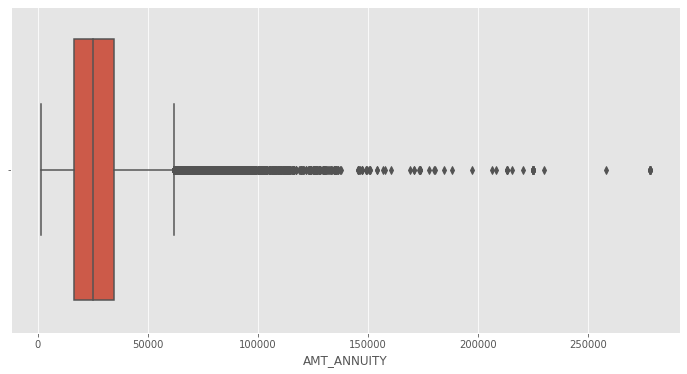

In [46]:
# AMT_ANNUITY
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
sns.boxplot(x='AMT_ANNUITY', data=df, ax=ax)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


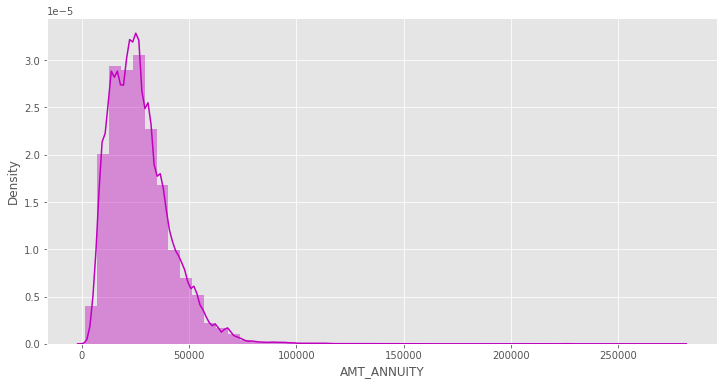

In [47]:
# AMT_ANNUITY
plt.figure(figsize=(12, 6))
sns.distplot(df['AMT_ANNUITY'], color='m')

### Observation

We see a right skewed variable

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


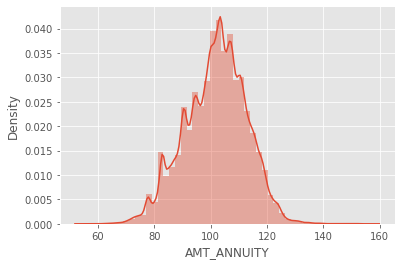

In [48]:
# AMT_ANNUITY
sns.distplot(df['AMT_ANNUITY'].apply(lambda x: np.log1p(x)**2))

In [49]:
# AMT_ANNUITY
df['AMT_ANNUITY'] = df['AMT_ANNUITY'].apply(lambda x: np.log1p(x)**2)

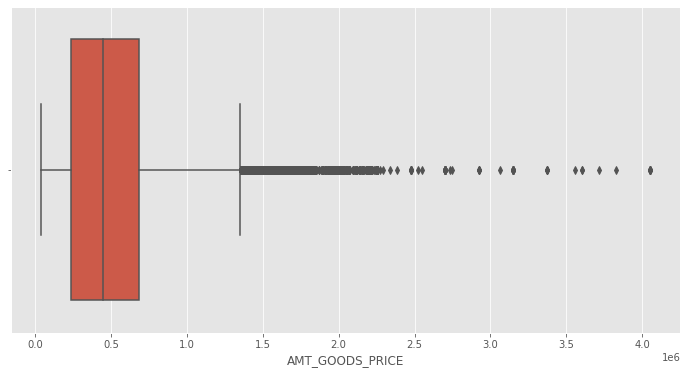

In [50]:
# AMT_GOODS_PRICE   
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
sns.boxplot(x='AMT_GOODS_PRICE', data=df, ax=ax)

In [51]:
# AMT_GOODS_PRICE
df = df[df['AMT_GOODS_PRICE'] > 2.5].reset_index(drop=True)

In [52]:
df.shape

(265579, 24)

In [53]:
# CNT_CHILDREN
df['CNT_CHILDREN'].value_counts()

0     185052
1      53266
2      23546
3       3251
4        353
5         76
6         16
7          6
14         3
19         2
12         2
9          2
8          2
11         1
10         1
Name: CNT_CHILDREN, dtype: int64

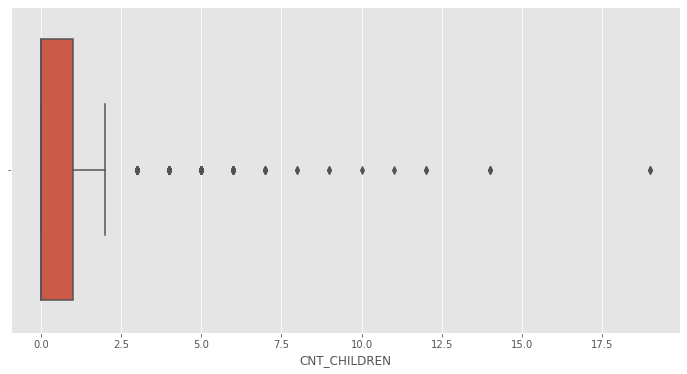

In [54]:
# CNT_CHILDREN
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
sns.boxplot(x='CNT_CHILDREN', data=df, ax=ax)

In [55]:
# CNT_CHILDREN
df = df[df['CNT_CHILDREN'] < 5].reset_index(drop=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


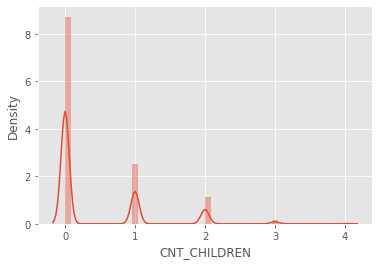

In [56]:
# CNT_CHILDREN
sns.distplot(df['CNT_CHILDREN'])

In [57]:
# CNT_FAM_MEMBERS
df['CNT_FAM_MEMBERS'].value_counts()

2.0    137385
1.0     57082
3.0     45858
4.0     21756
5.0      3053
6.0       334
Name: CNT_FAM_MEMBERS, dtype: int64

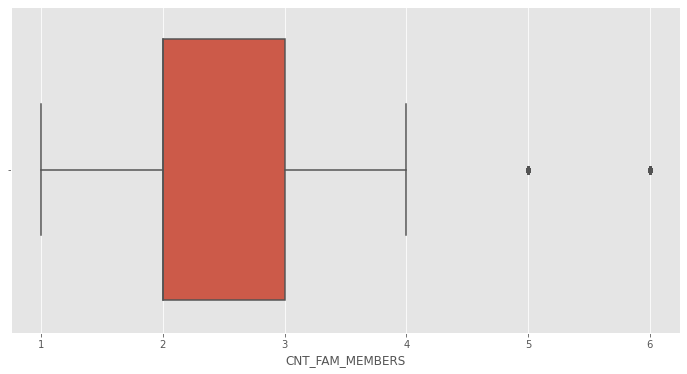

In [58]:
# CNT_FAM_MEMBERS
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
sns.boxplot(x='CNT_FAM_MEMBERS', data=df, ax=ax)

In [59]:
# CNT_FAM_MEMBERS
df = df[df['CNT_FAM_MEMBERS'] < 4].reset_index(drop=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


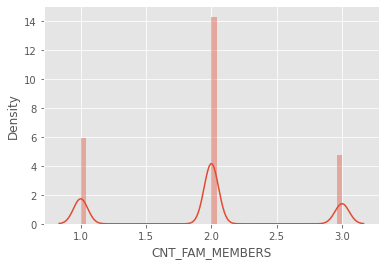

In [60]:
# CNT_FAM_MEMBERS
sns.distplot(df['CNT_FAM_MEMBERS'])

# EDA

In [61]:
def BivariateAnalysisPlot(segment_by):
    """A funtion to analyze the impact 
    of continuous variables on target
    """
    fig, ax = plt.subplots(ncols=1, figsize = (10, 8))
    
    # Boxplot
    sns.boxplot(x='TARGET', y=segment_by, data=df)
    plt.title("Box plot of "+segment_by)
    
    plt.show()

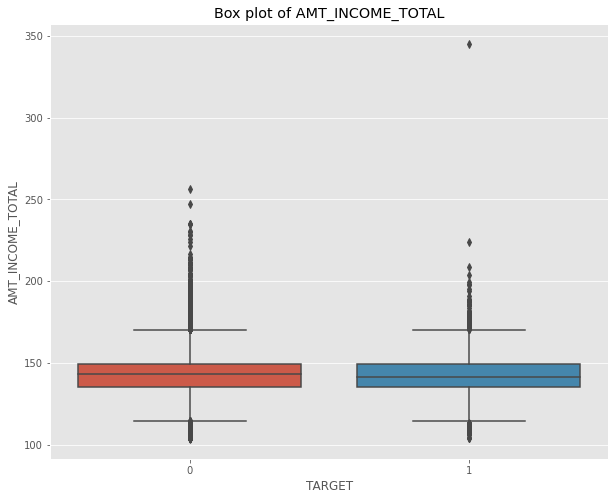

In [62]:
# AMT_INCOME_TOTAL
BivariateAnalysisPlot('AMT_INCOME_TOTAL') 

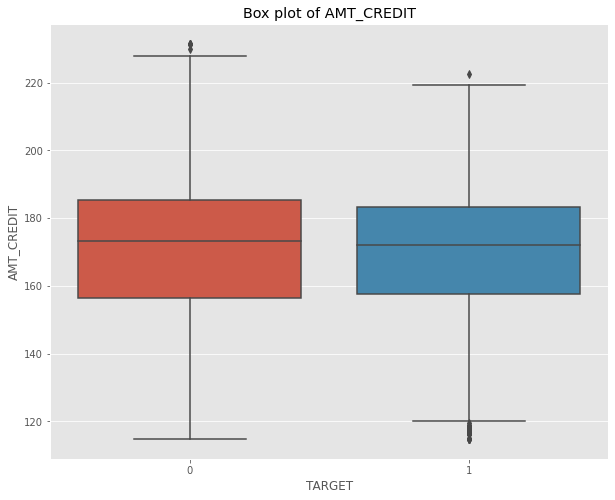

In [63]:
# AMT_CREDIT
BivariateAnalysisPlot('AMT_CREDIT')

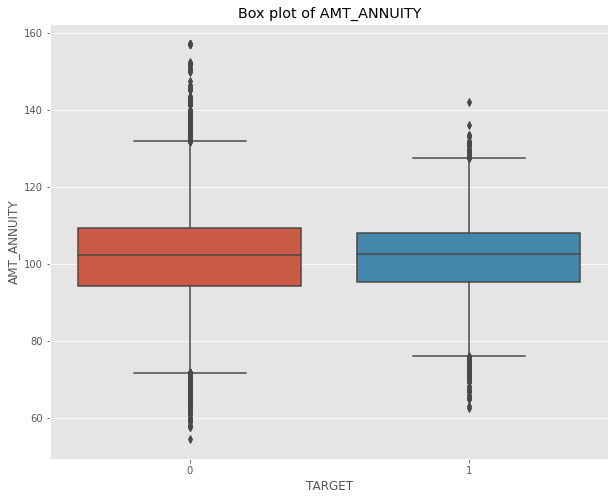

In [64]:
# AMT_ANNUITY
BivariateAnalysisPlot('AMT_ANNUITY')

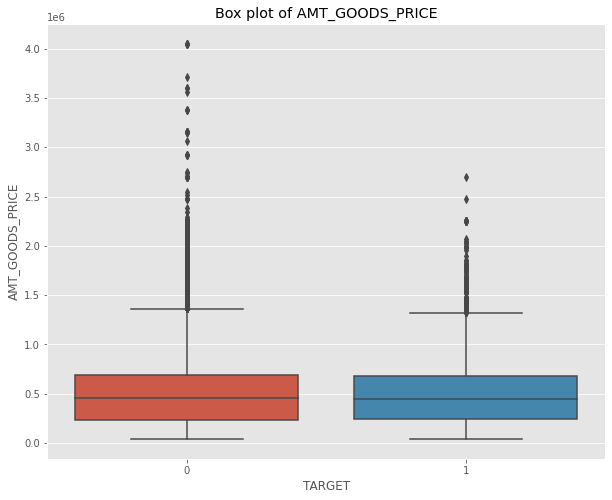

In [65]:
# AMT_GOODS_PRICE
BivariateAnalysisPlot('AMT_GOODS_PRICE')

# Multicollinearity


In [66]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [67]:
features = "+".join(df.columns.difference(['TARGET']))

In [68]:
# Perform vif correlation between variables

a, b = dmatrices(formula_like= 'TARGET ~ ' + features, 
                 data=df, 
                 return_type='dataframe')

vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["Features"] = b.columns

vif

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,Features
0,0.000000e+00,Intercept
1,1.231277e+00,CODE_GENDER[T.M]
2,1.000158e+00,CODE_GENDER[T.XNA]
3,1.212294e+00,FLAG_OWN_CAR[T.Y]
4,1.086921e+00,FLAG_OWN_REALTY[T.Y]
5,3.375781e+02,NAME_EDUCATION_TYPE[T.Higher education]
6,5.727079e+01,NAME_EDUCATION_TYPE[T.Incomplete higher]
7,2.235099e+01,NAME_EDUCATION_TYPE[T.Lower secondary]
8,3.744615e+02,NAME_EDUCATION_TYPE[T.Secondary / secondary sp...
9,2.896540e+00,NAME_FAMILY_STATUS[T.Married]


# Correlation Values

In [69]:
df.corr()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
TARGET,1.000000,0.019789,-0.013200,-0.013394,-0.002315,-0.038669,-0.034776,0.006272,0.054613,-0.020373,0.001283,0.003226,0.001848,-0.012207,-0.001481,0.019111
CNT_CHILDREN,0.019789,1.000000,0.042204,-0.008767,0.010916,-0.012437,-0.015757,0.723535,0.006898,0.001470,0.003537,-0.001052,-0.001772,-0.004198,-0.007758,-0.048019
AMT_INCOME_TOTAL,-0.013200,0.042204,1.000000,0.418848,0.484067,0.415705,0.178212,0.041624,-0.216408,0.099508,0.002886,0.004938,0.008146,0.072294,0.020762,0.058882
AMT_CREDIT,-0.013394,-0.008767,0.418848,1.000000,0.840677,0.914379,0.090159,0.085863,-0.093490,0.051984,-0.003444,0.004345,-0.001423,0.052505,0.014931,-0.039820
AMT_ANNUITY,-0.002315,0.010916,0.484067,0.840677,1.000000,0.768218,0.106148,0.099638,-0.119851,0.051207,0.003331,0.002100,0.011671,0.041046,0.010687,-0.006937
AMT_GOODS_PRICE,-0.038669,-0.012437,0.415705,0.914379,0.768218,1.000000,0.104888,0.084935,-0.105460,0.062864,-0.003231,0.005494,-0.000742,0.056656,0.014976,-0.052117
REGION_POPULATION_RELATIVE,-0.034776,-0.015757,0.178212,0.090159,0.106148,0.104888,1.000000,-0.014664,-0.531518,0.166721,-0.002323,0.002291,-0.002020,0.079534,-0.001238,0.000154
CNT_FAM_MEMBERS,0.006272,0.723535,0.041624,0.085863,0.099638,0.084935,-0.014664,1.000000,0.016645,-0.009367,0.004290,-0.002172,0.000279,-0.000792,-0.002435,-0.023251
REGION_RATING_CLIENT,0.054613,0.006898,-0.216408,-0.093490,-0.119851,-0.105460,-0.531518,0.016645,1.000000,-0.279966,0.006076,-0.004008,0.001313,-0.070455,0.005488,0.012330
HOUR_APPR_PROCESS_START,-0.020373,0.001470,0.099508,0.051984,0.051207,0.062864,0.166721,-0.009367,-0.279966,1.000000,-0.014616,0.002563,-0.003443,0.038012,-0.001322,-0.033176


# Confusion Matrix

In [70]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): 
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=['Non Default', 'Default']
    cmap = plt.cm.Blues
    title = 'Confusion Matrix'
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

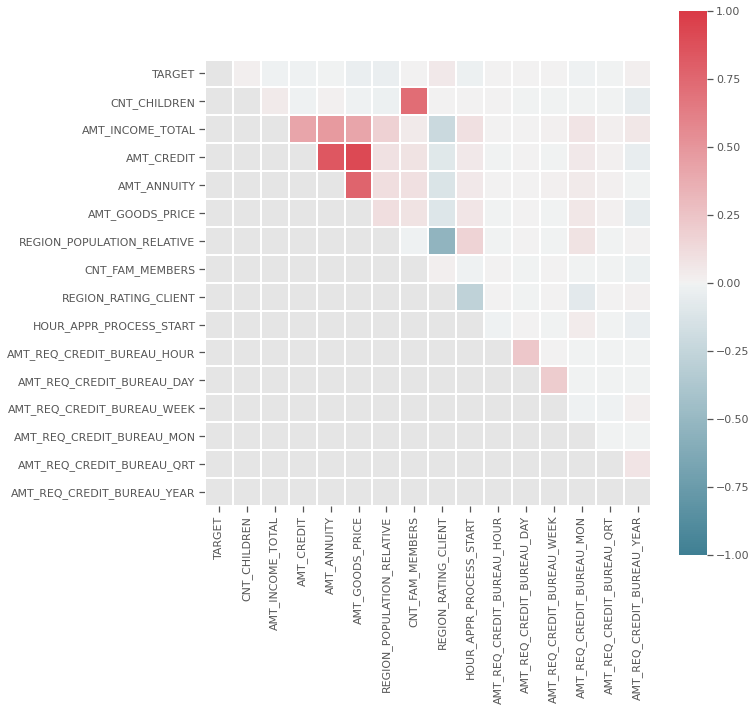

In [71]:
dataviz = df
sns.set_context(context='notebook')
fig, ax = plt.subplots(figsize=(10, 10)) 
corr = dataviz.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap, linewidths=1, 
            vmin=-1, 
            vmax=1, 
            square=True, 
            cbar=True, 
            center=0, 
            ax=ax, 
            mask=mask
            )

# Create dummy variables for all categorical variables

In [73]:
# remove Xs , NAME_CONTRACT_TYPE and ORGANIZATION_TYPE
df_train = pd.get_dummies(df, columns=['CODE_GENDER', 'FLAG_OWN_CAR', 
                                     'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 
                                     'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
                                     'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE'], drop_first=True)

# Standard processing and Training/Test set Split

In [74]:
X = df_train.loc[:, df_train.columns != 'TARGET'] # Feature matrix excl Target variable
y = df_train.loc[:, 'TARGET'] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Model Evaluation

### Draft Modeling: Random Forest

In [75]:
rf = ensemble.RandomForestClassifier(n_estimators=200, criterion='gini',
                                     max_depth=None,
                                     min_samples_split=2,
                                     min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0,
                                     max_features='auto',
                                     max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     bootstrap=True,
                                     oob_score=False,
                                     n_jobs=1,
                                     random_state=None,
                                     verbose=0,
                                     warm_start=False,
                                     class_weight=None
                                     )

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     66660
           1       0.17      0.00      0.00      5438

    accuracy                           0.92     72098
   macro avg       0.55      0.50      0.48     72098
weighted avg       0.87      0.92      0.89     72098



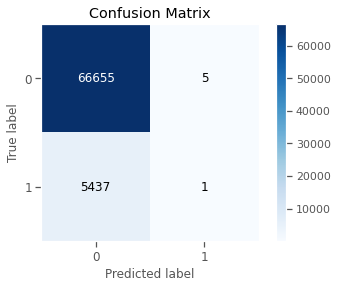

In [77]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [78]:
fi = rf.feature_importances_

In [79]:
feature_cols = X_test.columns
importance = pd.DataFrame(
    {'feature': feature_cols, 'importance': rf.feature_importances_}
)

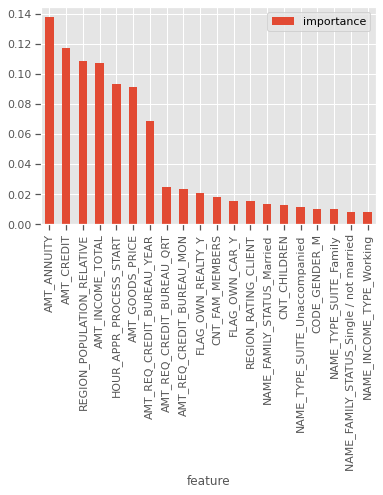

In [81]:
importance = pd.DataFrame(
    {'feature': feature_cols[:], 'importance': rf.feature_importances_[:]}
)

importance.sort_values(by='importance', axis=0,
                       ascending=False,
                       inplace=True,
                       kind='quicksort',
                       na_position='last'
                       )

importance[:20].plot(x='feature', y='importance', kind='bar')

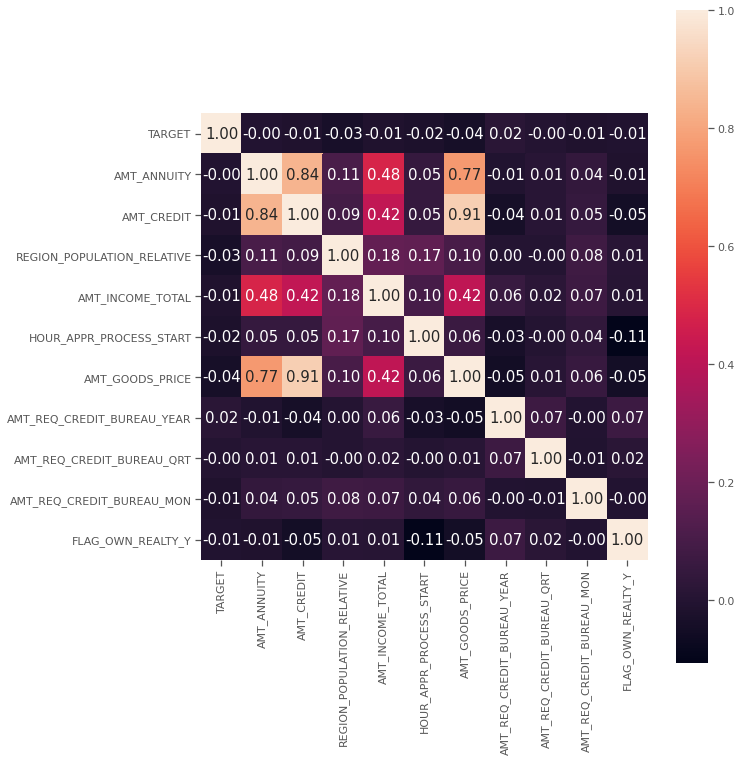

In [82]:
# Plot heatmap
cols = list(importance.feature[:10])
cols.insert(0, 'TARGET')
corrcoef_map = np.corrcoef(df_train[cols].values.T)
fig, ax = plt.subplots(figsize=(10, 12))  # Sample figsize in inches
hm = sns.heatmap(corrcoef_map, cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols,
                 ax=ax
                 )

### Modeling Random Forest

In [83]:
rf = ensemble.RandomForestClassifier(n_estimators=800, criterion='gini',
                                     max_depth=None,
                                     min_samples_split=2,
                                     min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0,
                                     max_features='auto',
                                     max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     bootstrap=True,
                                     oob_score=False,
                                     n_jobs=1,
                                     random_state=None,
                                     verbose=0,
                                     warm_start=False,
                                     class_weight=None
                                     )

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     66660
           1       0.14      0.00      0.00      5438

    accuracy                           0.92     72098
   macro avg       0.53      0.50      0.48     72098
weighted avg       0.87      0.92      0.89     72098



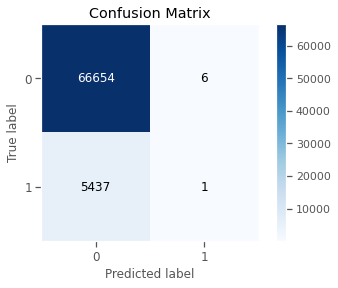

In [85]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [86]:
fi = rf.feature_importances_

In [87]:
feature_cols = X_test.columns
importance = pd.DataFrame(
    {'feature': feature_cols, 'importance': rf.feature_importances_}
)

Text(0, 0.5, 'importance')

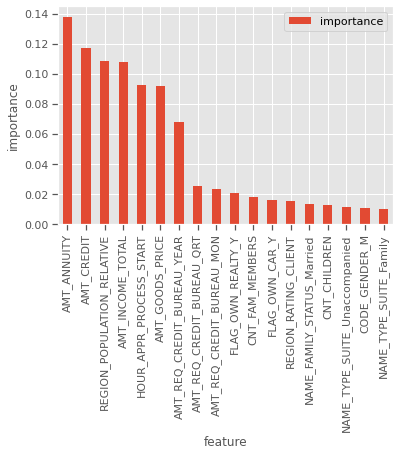

In [88]:
feature_cols = X_test.columns
importance = pd.DataFrame(
    {'feature': feature_cols[:], 'importance': rf.feature_importances_[:]}
)

importance.sort_values(by='importance', axis=0,
                       ascending=False,
                       inplace=True,
                       kind='quicksort',
                       na_position='last'
                       )

importance[:18].plot(x='feature', y='importance', kind='bar')
plt.ylabel('importance')

### Decision tree

In [89]:
clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best', 
                                  max_depth=5,
                                  min_samples_split=2,
                                  min_samples_leaf=1,
                                  min_weight_fraction_leaf=0.0,
                                  max_features=None,
                                  random_state=None,
                                  max_leaf_nodes=None,
                                  min_impurity_decrease=0.0,
                                  min_impurity_split=None,
                                  class_weight=None,
                                  presort=False
                                  )

model = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     66660
           1       0.00      0.00      0.00      5438

    accuracy                           0.92     72098
   macro avg       0.46      0.50      0.48     72098
weighted avg       0.85      0.92      0.89     72098



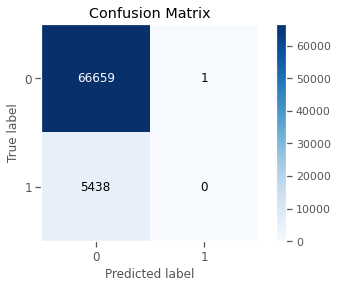

In [91]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

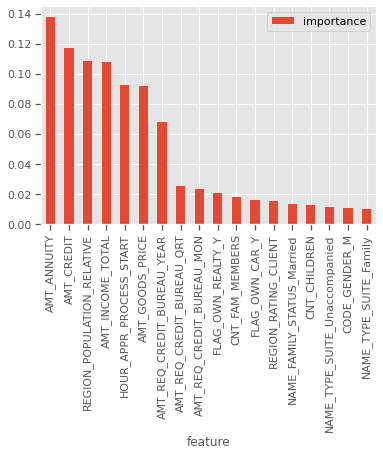

In [92]:
feature_cols = X_test.columns
importance = pd.DataFrame(
    {'feature': feature_cols[:], 'importance': rf.feature_importances_[:]}
)

importance.sort_values(by='importance', axis=0, 
                       ascending=False,
                       inplace=True,
                       kind='quicksort',
                       na_position='last'
                       )

importance[:18].plot(x='feature', y='importance', kind='bar')

### Gradient Boosting Classifier

In [93]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(loss='deviance', learning_rate=0.1,
                                 n_estimators=200,
                                 subsample=1.0,
                                 criterion='friedman_mse',
                                 min_samples_split=2,
                                 min_samples_leaf=1,
                                 min_weight_fraction_leaf=0.0,
                                 max_depth=3,
                                 min_impurity_decrease=0.0,
                                 min_impurity_split=None,
                                 init=None,
                                 random_state=None,
                                 max_features=None
                                 )

model = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     66660
           1       0.29      0.00      0.00      5438

    accuracy                           0.92     72098
   macro avg       0.61      0.50      0.48     72098
weighted avg       0.88      0.92      0.89     72098



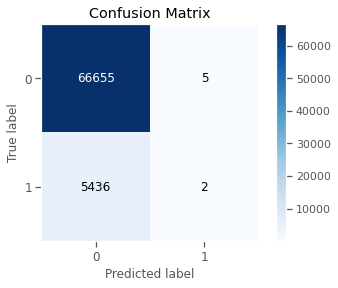

In [95]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

### Feature Scaling for SVM and Logistic Regression

In [96]:
# Standard processing
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Logistic Regression

In [97]:
lr = LogisticRegression(penalty='l2', C=1).fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     66656
           1       0.00      0.00      0.00      5442

    accuracy                           0.92     72098
   macro avg       0.46      0.50      0.48     72098
weighted avg       0.85      0.92      0.89     72098



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


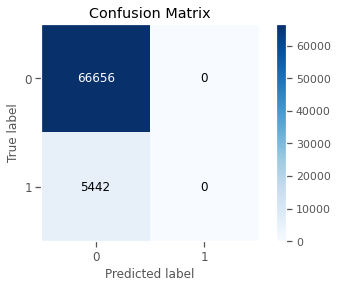

In [99]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [100]:
def plot_decision_boundary(model, X, y):
    X_max = X.max(axis=0)
    X_min = X.min(axis=0)
    xticks = np.linspace(X_min[0], X_max[0], 100)
    yticks = np.linspace(X_min[1], X_max[1], 100)
    xx, yy = np.meshgrid(xticks, yticks)
    ZZ = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = ZZ >= 0.5
    Z = Z.reshape(xx.shape)
    fig, ax = plt.subplots()
    ax = plt.gca()
    ax.contourf(xx, yy, Z, cmap=plt.cm.PRGn, alpha=0.6)
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, alpha=0.6)

In [101]:
X = df_train[['AMT_CREDIT', 'AMT_GOODS_PRICE']]
y = df_train['TARGET']

In [102]:
rf = ensemble.RandomForestClassifier(n_estimators=500, criterion='gini',
                                     max_depth=4,
                                     min_samples_split=2,
                                     min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0,
                                     max_features='auto',
                                     max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     bootstrap=True,
                                     oob_score=False,
                                     n_jobs=1,
                                     random_state=None,
                                     verbose=0,
                                     warm_start=False,
                                     class_weight=None
                                     )

X_train, X_test, y_train, y_test = train_test_split(X, y)
model = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
f1 = f1_score(y_pred, y_test)
f1

0.0

In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     55533
           1       0.00      0.00      0.00      4549

    accuracy                           0.92     60082
   macro avg       0.46      0.50      0.48     60082
weighted avg       0.85      0.92      0.89     60082



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


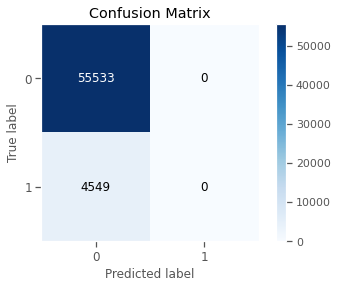

In [104]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

Text(0, 0.5, 'AMT_GOODS_PRICE')

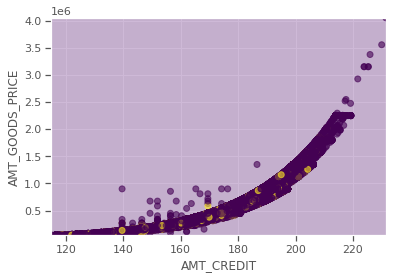

In [105]:
plot_decision_boundary(model, X_test, y_test)
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_GOODS_PRICE')

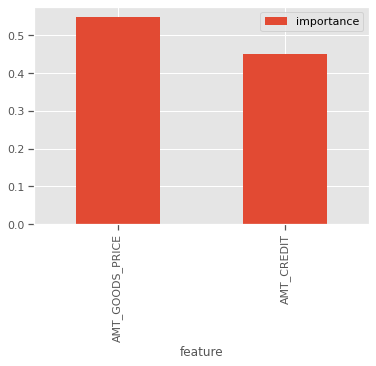

In [106]:
feature_cols = X_test.columns
importance = pd.DataFrame(
    {'feature': feature_cols[:], 'importance': rf.feature_importances_[:]}
)

importance.sort_values(by='importance', axis=0,
                       ascending=False,
                       inplace=True,
                       kind='quicksort',
                       na_position='last'
                       )

importance[:18].plot(x='feature', y='importance', kind='bar')